# Pratice project 1-World happiness score

#WORLD HAPPINESS SCORE



The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in. 


In [110]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [111]:
df=pd.read_csv("happiness_World_score.csv")

In [112]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [113]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

About the columns:
    
Standard Error:
    
    The standard error (SE) of a statistic is the approximate standard deviation of a statistical sample population. The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error of the mean.
    
Economy:
    
    An economy encompasses all activity related to production, consumption, and trade of goods and services in an area. ... The economy of a particular region or country is governed by its culture, laws, history, and geography, among other factors, and it evolves due to the choices and actions of the participants.
    
Family:
    
    Family, a group of persons united by the ties of marriage, blood, or adoption, constituting a single household and interacting with each other in their respective social positions, usually those of spouses, parents, children, and siblings. The family group should be distinguished from a household, which may include boarders and roomers sharing a common residence.
    
Health:
    
    This column states that the maximum age can live in the particular country and for that good government hospitals will be there, surrounings must be clean and country should be pollution free for maximum life expectancy.
    
Freedom:
    
    This column states that how freely a person can be rome on streets without fear of theft and more how much state police is active.
    

Trust:
    
    Trust is one of the core foundations upon which all legitimate and sustainable political systems are built: it is essential for social cohesion and well-being. Particularly as a result of the economic crisis, citizens’ trust in public institutions has recently plummeted in most countries. Surveys have shown that corruption is the principal reason for the decline of trust levels.


Generosity:
   
    The quality of being kind, understanding, and not selfish : the quality of being generous especially : willingness to give money and other valuable things to others.
   

Dystopia Residual:   
    
    Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

   

    


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# EDA

Scatter Plots

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

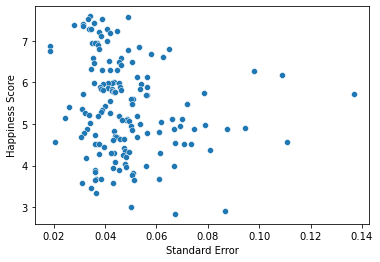

In [6]:
import seaborn as sns
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

we can see the standard error is majorly distributed in the range of 0.3 to 0.6,
from this we find that some outliers are present.

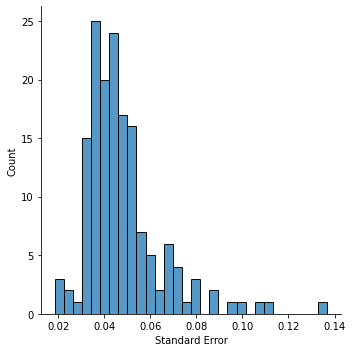

In [115]:
sns.displot(df, x="Standard Error", bins=30)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

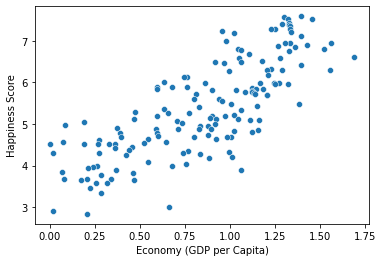

In [8]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

we can see the Economy (GDP per Capita) is majorly distributed in the range of 0.25 to 1.3,
from this we find that some outliers are present.

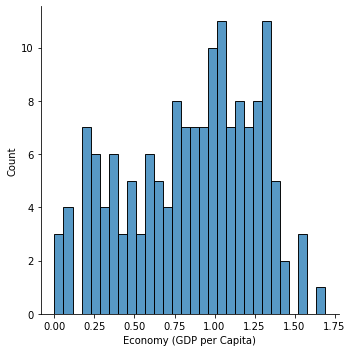

In [114]:
sns.displot(df, x="Economy (GDP per Capita)", bins=30)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

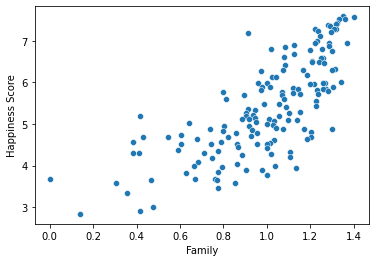

In [10]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

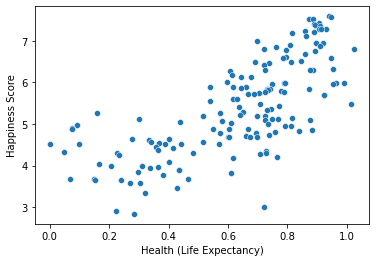

In [11]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

we can see the Health (Life Expectancy) is majorly distributed in the range of 0.3 to 1.

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

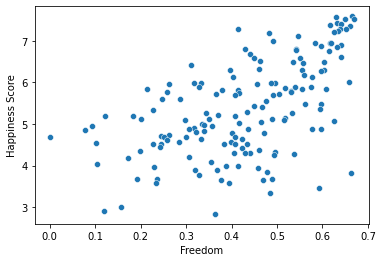

In [12]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)  

we can see the Freedom is majorly distributed in the range of 0.1 to 0.7.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

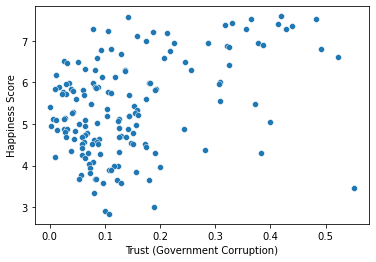

In [13]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)  

we can see the Trust (Government Corruption) is majorly distributed in the range of 0.0 to 0.2,
from this we find that some outliers are present.

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

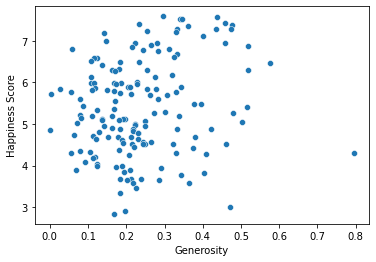

In [14]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)  

we can see the Generosity is majorly distributed in the range of 0.0 to 0.6.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

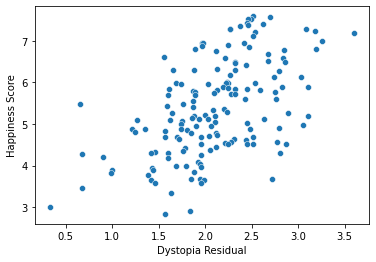

In [15]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

we can see the Dystopia Residual is majorly distributed in the range of 1.25 to 3,
from this we find that some outliers are present.

In [16]:
#lets make a new datasets, drop few columns as of no use.
df1=df.iloc[:,3:12]

In [17]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# CORRELATION:

In [18]:
#lets find the correlation between them.
df1.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


As we can see that correation between standard error and happiness score is -ve so we can easily drop the standard error.

<AxesSubplot:>

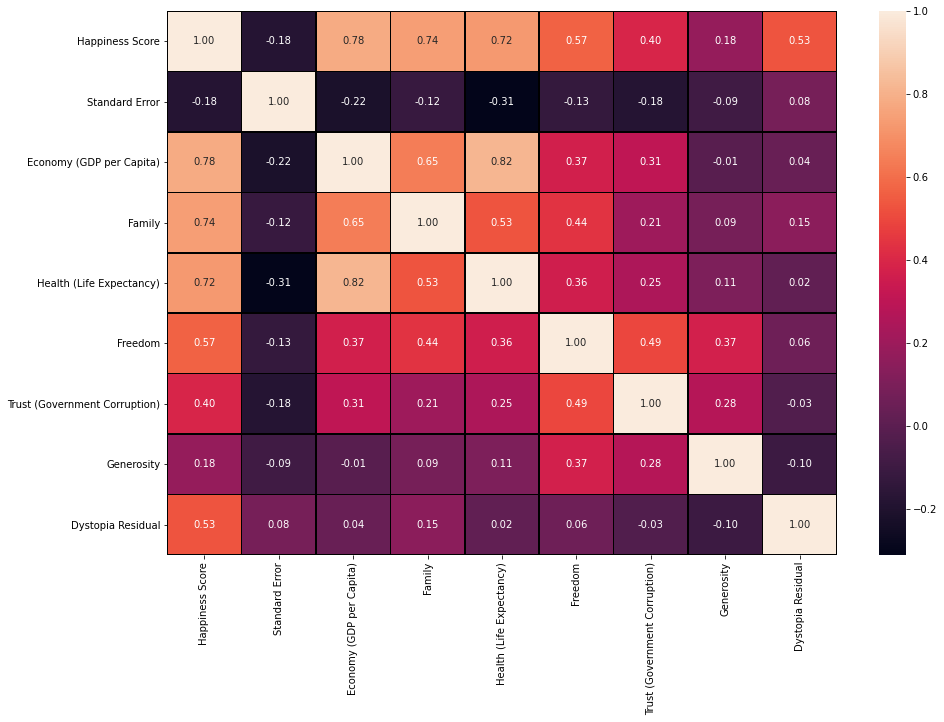

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f' )


# Outcome of Correlation:

standard error is negative correlated to hapiness score.

Economy having 78% correlated to happiness score which is very good relation.

Family having 74% correlated to happiness score which is  good relation.

Health having 72% also a good bond.

Freedom having 57% good relation.

Trust having 40%  medium relation.

Generosity having only 18% which is not that good relation.

Dystopia having medium relation.

max correlation: Economy

min correlation: Generosity

negative correlation: Standard error

# Describing Datasets:

In [20]:
df1.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


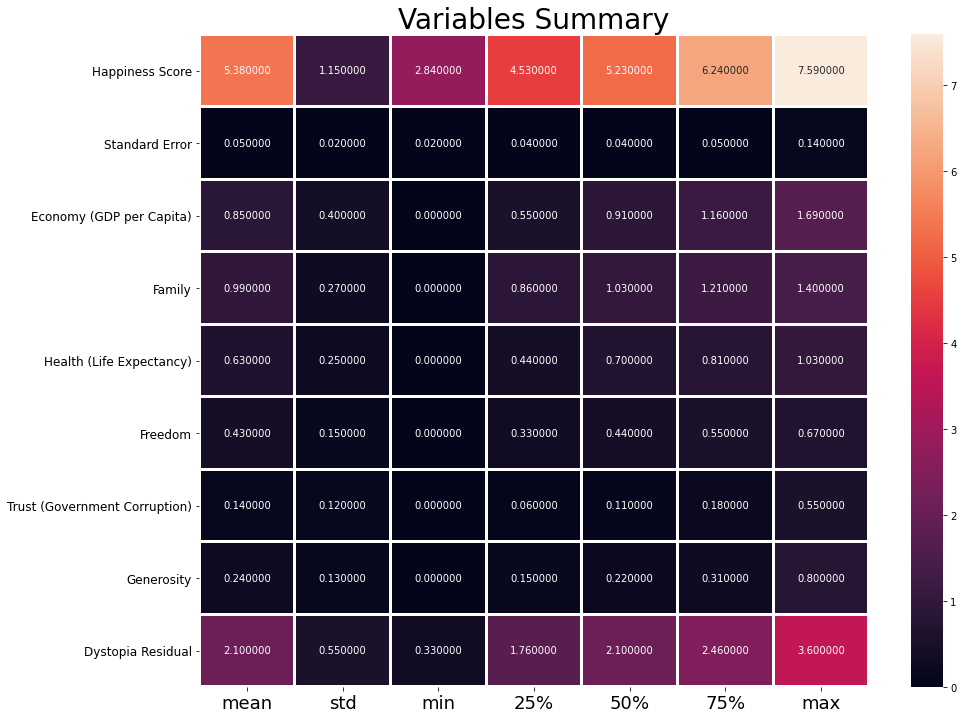

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary",fontsize=28)
plt.show()

From above ploting we can easily look at mean,std-deviation,min and max values of eacy columns,it helps in futher data cleaning.



Total no of rows in dataset:


    1.158 rows
    2.9 columns
 
Standard Error:


    1.mean= 0.05
    2.std=  0.02
    3.min=  0.02
    4.max=  0.14
    
Economy (GDP per Capita):


    1.mean= 0.85
    2.std=  0.4
    3.min=  0.00
    4.max=  1.69
    
Family:


    1.mean= 0.99
    2.std=  0.27
    3.min=  0.00
    4.max=  1.4

Health (Life Expectancy):


    1.mean= 0.63
    2.std=  0.25
    3.min=  0.00
    4.max=  1.03

Freedom:


    1.mean= 0.43
    2.std=  0.15
    3.min=  0.00
    4.max=  0.67
    
    
Trust (Government Corruption):


    1.mean= 0.14
    2.std=  0.12
    3.min=  0.00
    4.max=  0.55
    
Generosity:


    1.mean= 0.24
    2.std=  0.13
    3.min=  0.00
    4.max=  0.8

Dystopia Residual:


    1.mean= 2.1
    2.std=  0.55
    3.min=  0.33
    4.max=  3.6


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


From the above code we can have the columns datatype and memory used by the dataframe.

# Outliers cheaking:

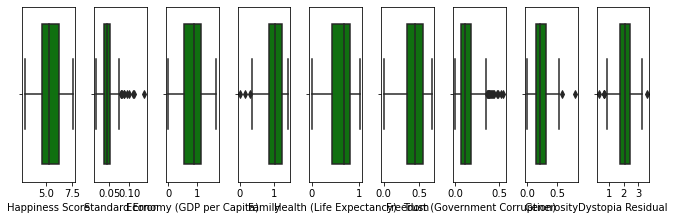

In [23]:
collist=df1.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


From above ploting we can find that there is outliers are present in:

Standard error

family

trust

Dystopia residual

# Skewness:

In [24]:
df1.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

-.05=<x=<+.5 then data is normally distribute
and if range cross then data is skewed
from above we can understand that

Outcome of the skewness:
    threshold value will be +/-0.65.

skwed columns are

Standard error

family

health

trust

Genrosity



# Normal Distribution Curve:

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

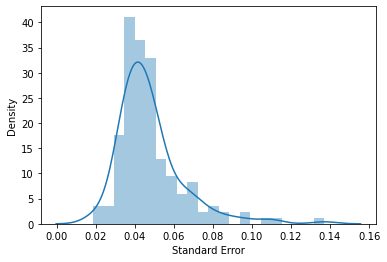

In [25]:
sns.distplot(df1['Standard Error'])

The data is not normalized.the building blocks are out of the normal curve

<AxesSubplot:xlabel='Family', ylabel='Density'>

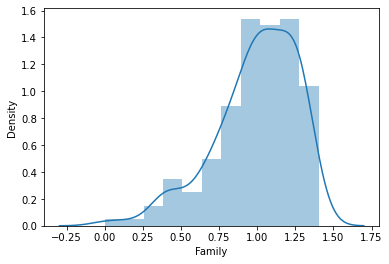

In [26]:
sns.distplot(df1['Family'])

The data is not normalized.the building blocks are out of the normal curve

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

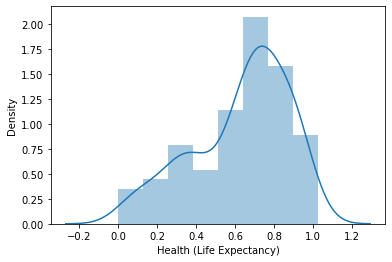

In [27]:
sns.distplot(df1['Health (Life Expectancy)'])

The data is not normalized.the building blocks are out of the normal curve

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

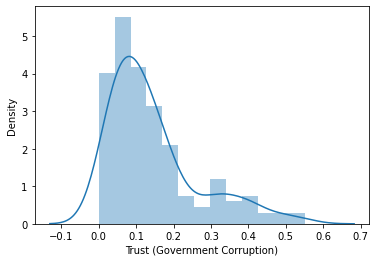

In [28]:
sns.distplot(df1['Trust (Government Corruption)'])

The data is not normalized.the building blocks are out of the normal curve

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

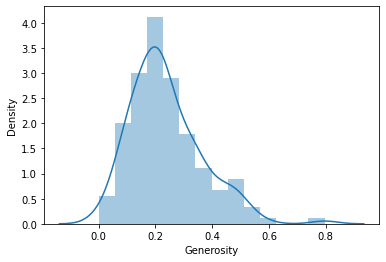

In [29]:
sns.distplot(df1['Generosity'])

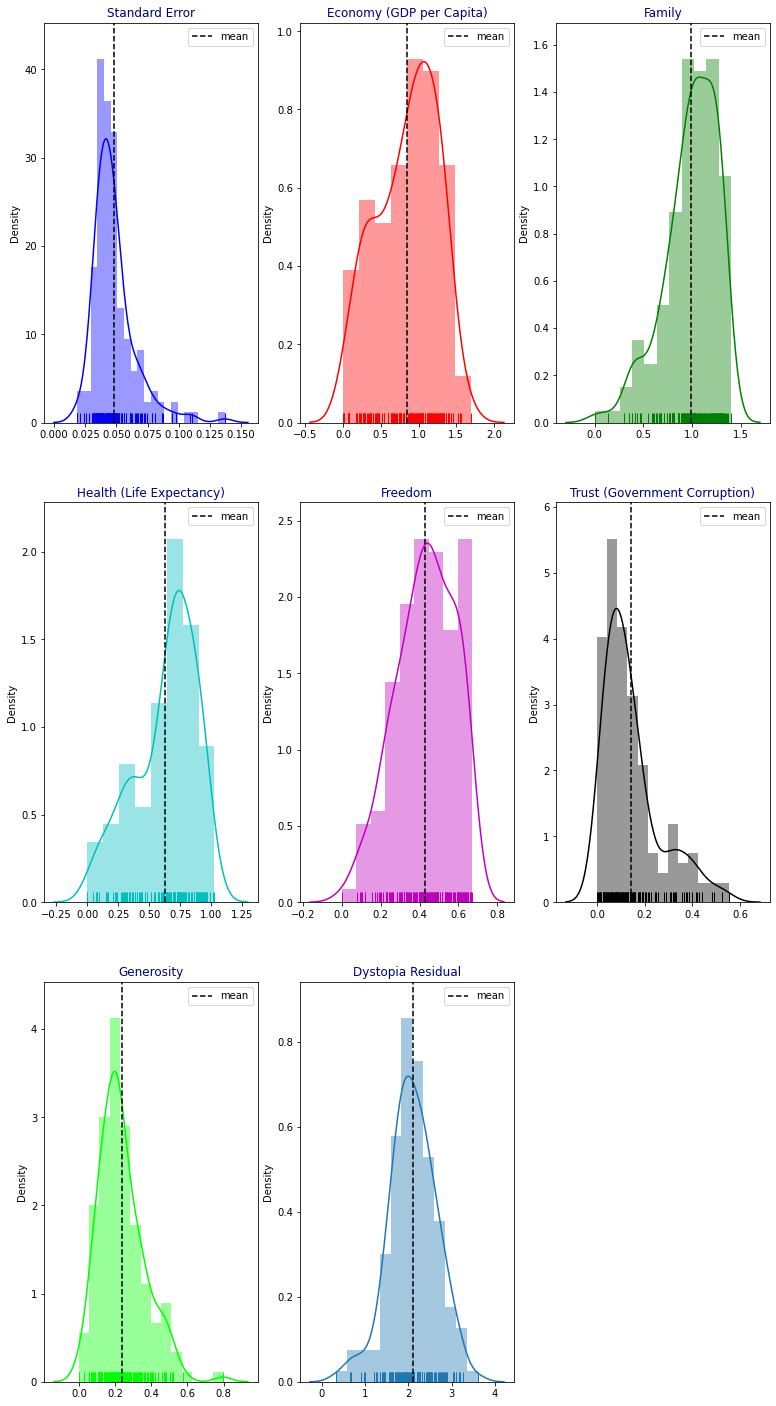

In [32]:
import itertools

cols = ['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

The data is not normalized.the building blocks are out of the normal curve

# The Normal Distribution showed that data is skewed:         

# Data Cleaning

In [33]:
df=df1.drop('Standard Error',axis=1)

In [34]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers

Z-Score technique

In [35]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 8)

In [36]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [37]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 8)
(152, 8)


# Percentage data loss:

In [38]:
loss_percentage=(158-152)/158*100
loss_percentage

3.79746835443038

Cheaking weather how much outliers are still there.if the outliers there help in the testing the model or not.

# Dividing data in features and vectors:

In [39]:
x=df_new.iloc[:,1:9]
y=df_new.iloc[:,-8]

In [40]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [41]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

In [42]:
x.shape

(152, 7)

In [43]:
y.shape

(152,)

# Transforming data to remove skewness:

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [45]:
x

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

# lets see what happens when outliers are removed

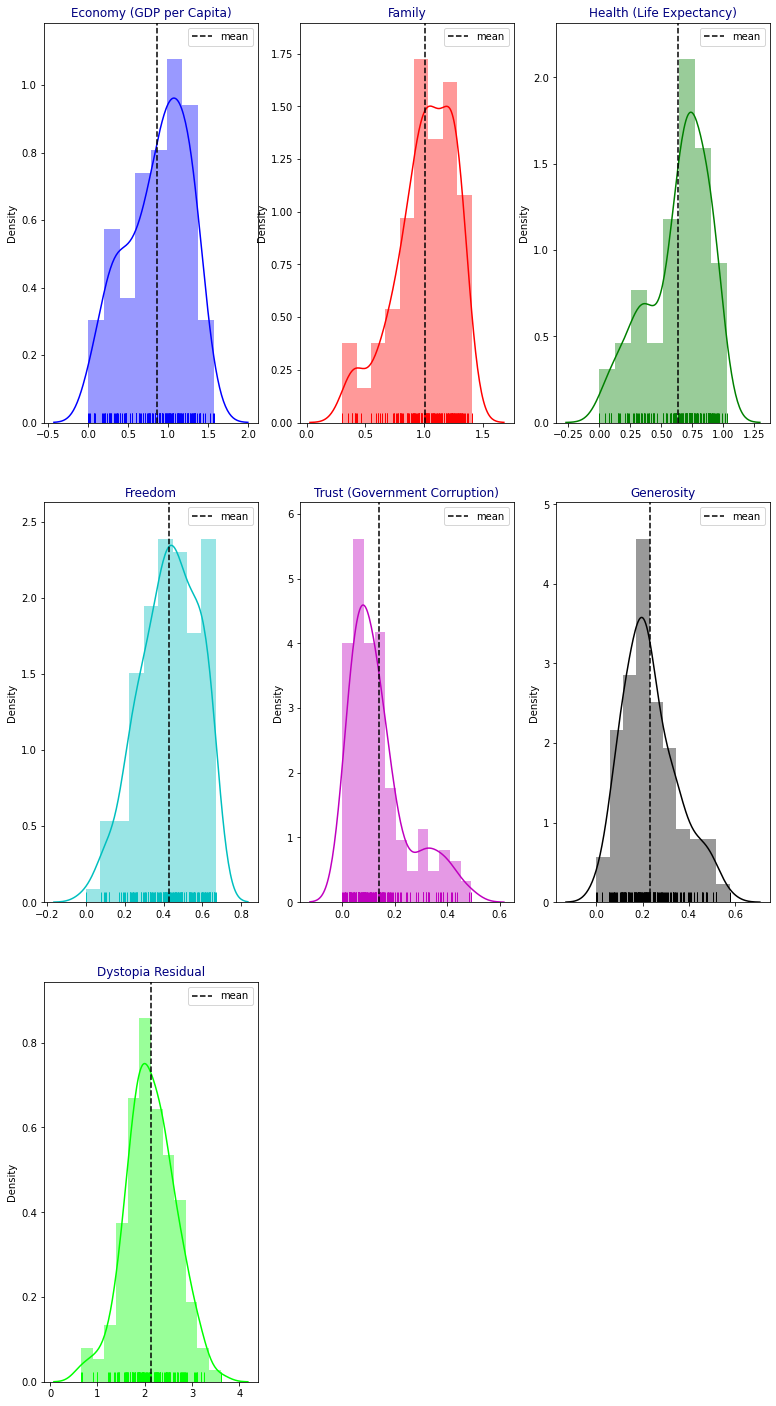

In [47]:
import itertools

cols = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df_new[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_new[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Since target  column has continouse variable we will use linear classification model

# Linear-Regressor Model Building

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [50]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 35  The model performs very well
At random_state:- 35
Training r2_score is:- 99.41941500139778
Testing r2_score is:- 99.41805433270517
At random state 84  The model performs very well
At random_state:- 84
Training r2_score is:- 99.42535561588507
Testing r2_score is:- 99.42580867448324
At random state 95  The model performs very well
At random_state:- 95
Training r2_score is:- 99.41878851211071
Testing r2_score is:- 99.42452223808522
At random state 213  The model performs very well
At random_state:- 213
Training r2_score is:- 99.41702297665826
Testing r2_score is:- 99.42000219092294
At random state 251  The model performs very well
At random_state:- 251
Training r2_score is:- 99.42334172454017
Testing r2_score is:- 99.42299345900038
At random state 312  The model performs very well
At random_state:- 312
Training r2_score is:- 99.41502027959285
Testing r2_score is:- 99.41676350500792
At random state 451  The model performs very well
At random_state:- 451
Training r2_scor

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=84)

from above cross validation,at random state 84 the training score and testing score is same which means at random state 84 model performs optimum.

In [109]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)*100


99.42580867448324

In [63]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))


Error:
Mean Absolute Error: 0.06884285433500345
Mean Squared Error: 0.007680350403564556
Root Mean Square Error: 0.08763760838569566


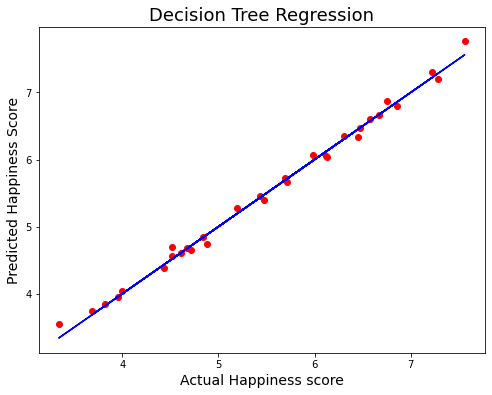

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# as model fits well there is no need of regurlization..

# Ensemble Techniques:

Decision Tree Regressor

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'best'}


In [73]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 87.28571757800262
Cross Val Score: -453.21947767265823


In [67]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.35832258064516154
Mean Squared Error: 0.18081103225806464
Root Mean Square Error: 0.42521880515572763


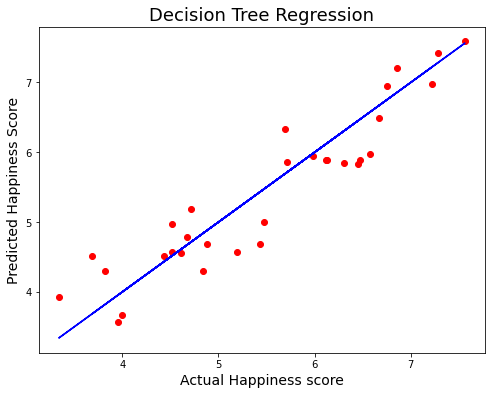

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [74]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)

rfs = r2_score(ytest,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 93.94892896107885
Cross Val Score: -373.8752107223587


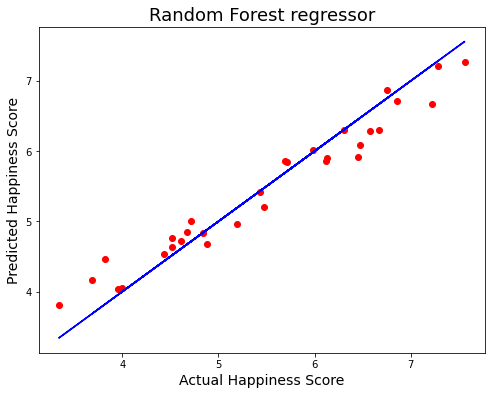

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [77]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'lad', 'n_estimators': 200}


In [78]:
gbr= GradientBoostingRegressor(criterion='mse',loss='lad',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_random = gbr.predict(xtest)

gbrs= r2_score(ytest,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=2)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 96.3385989463844
Cross Val Score: -346.54736026911286


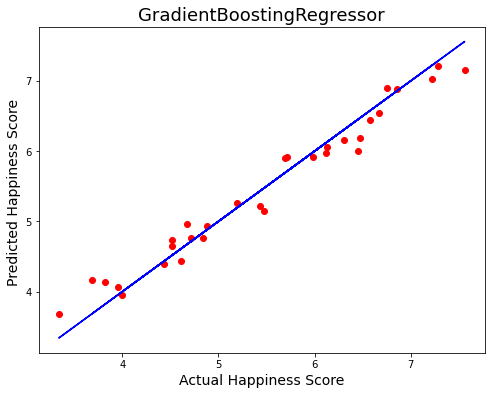

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score ',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [80]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale']}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'linear'}


In [94]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

svs = r2_score(ytest,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 99.44315751645956
Cross Val Score: 90.37852288789666


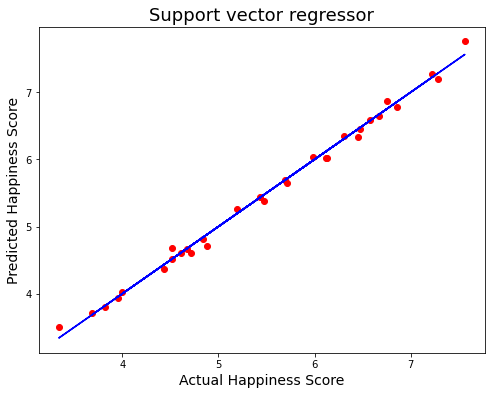

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


In [96]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'auto', 'weights': 'distance'}


In [100]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance')
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

kns = r2_score(ytest,pred_vector)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=10)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 99.44315751645956
Cross Val Score: -22.187502270395733


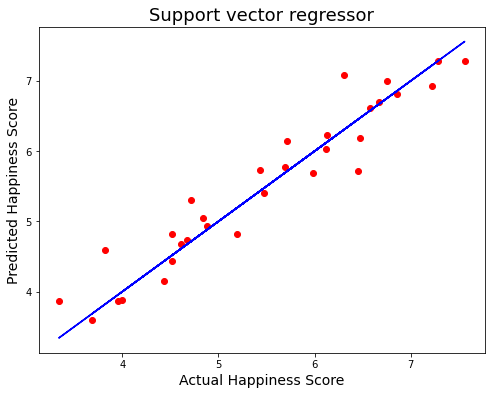

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# The best model is Linear Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [105]:
import pickle
filename='World-Happiness-Score.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion:

In [108]:
import numpy as np
a=np.array(ytest)
predicted=np.array(lr.predict(xtest))
df_com=pd.DataFrame({"Original":a,"Predicted":predicted}, index=range(len(a) ))
df_com

,Original,Predicted
0,7.286,7.204750
1,6.574,6.597552
2,5.984,6.072212
3,3.956,3.955053
4,6.123,6.047559
5,6.130,6.044381
6,3.995,4.044063
7,6.302,6.356158
8,4.715,4.645750
9,4.517,4.690018


# As our model score is 100% our model performs very well.